***
$\mathbf{\text{Gradient Descent Algorithm}}$<br>
***
Dataset {${x_{i},y_{i}}$} $_{i=1}^{n}$\
Simple Linear equation for prediction --> $\hat y = mx+c$\
Here m (slope) and c(intercept) are parameters of the prediction equation


Loss Function (Sum of Squared errors) --> $L(m,c)$ = $\sum\limits_{i=1}^{n}(y_{i}-(mx_{i}+c))^2$\
Find the values of m & c in order to minimize the loss function, We will take the partial derivatives of this function with respect to m & c respectively


slope_m = $\frac{\partial L(m,c)} {\partial m}= -2\sum\limits_{i=1}^{n}(y_{i}-mx_{i}-c)x_{i}$\
slope_c = $\frac{\partial L(m,c)} {\partial c}= -2\sum\limits_{i=1}^{n}(y_{i}-mx_{i}-c)$\
Here we get 2 slopes one with respect to m and other with rest to c. For n-dimensions when we get a vector of slopes we call it as **GRADIENT**.

Gradient = $\Delta L = \begin{bmatrix}\frac{\partial L(m,c)} {\partial m} \\ \frac{\partial L(m,c)} {\partial c}\end{bmatrix}$

We want to move in the opposite direction of slopes or gradient collectively to reach the minimum of loss function. This is called **DESCENT**

negation of slope_m = $-\bigg[\frac{\partial L(m,c)}{\partial m}\bigg]$\
negation of slope_c = $-\bigg[\frac{\partial L(m,c)}{\partial c}\bigg]$

Step Size for m = $-\eta\bigg[\frac{\partial L(m,c)}{\partial m}\bigg]$\
Step Size for c = $-\eta\bigg[\frac{\partial L(m,c)}{\partial c}\bigg]$\
where $\eta$ is the learning rate which is a hyperparameter.

Updating the values of parameters m & c :\
$m_{new} = m_{old} -\eta\bigg[\frac{\partial L(m,c)}{\partial m}\bigg]$\
$c_{new} = c_{old} -\eta\bigg[\frac{\partial L(m,c)}{\partial c}\bigg]$

The above process of updating the values will continue until either of the 2 conditions are met :\
Condition 1: **Minimum Step Size is equal to 0.001 or smaller**\
Condition 2: **Maximum Number of Steps is equal to 1000 or greater**

This process of repeatedly taking steps in the opposite direction of gradient of the differentiable function at current point in order to reach its minimum is called **GRADIENT DESCENT**


####**Steps to perform Gradient Descent**

**Step1:** Take the derivative of the loss function for each parameter in it.

**Step2:** Pick random values for the parameters.

**Step3:** Plug the parameter values into the derivatives (the Gradient)

**Step4:** Calculate the step sizes: Step Size = Slope X Learning Rate

**Step5:** Calculate the new parameters:
New Parameter  = Old Parameter - Step Size

**Iteration:** Now go back to **Step3** and repeat until **Step Size is very small**, or you reach the **Maximum Number of Steps**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import HTML

In [14]:
X,y = make_regression(n_samples=5,n_features=1,n_informative=1,n_targets=1,noise=30,random_state=13)

In [15]:
df = pd.DataFrame({'Input(X)': X.ravel(),'Output(y)': y})
df

,Input(X),Output(y)
0,1.345102,116.052765
1,-0.712391,-29.737799
2,-0.044503,-7.157073
3,0.753766,38.939981
4,0.451812,18.395462


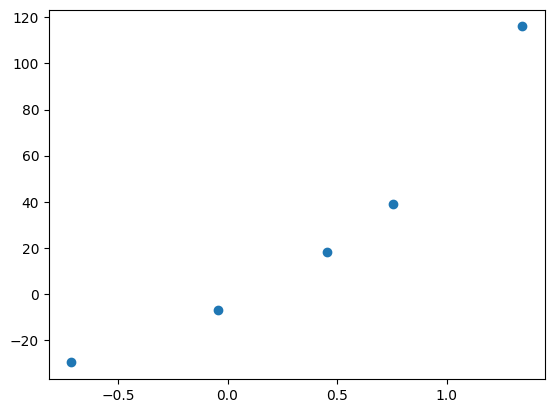

In [16]:
plt.scatter(data=df,x='Input(X)',y='Output(y)')

In [17]:
# performing LinearRegression to get the values of m & c for validation
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)
m_ols = regressor.coef_
c_ols = regressor.intercept_
print(m_ols)
print(c_ols)

[67.94615406]
2.9224859302119093


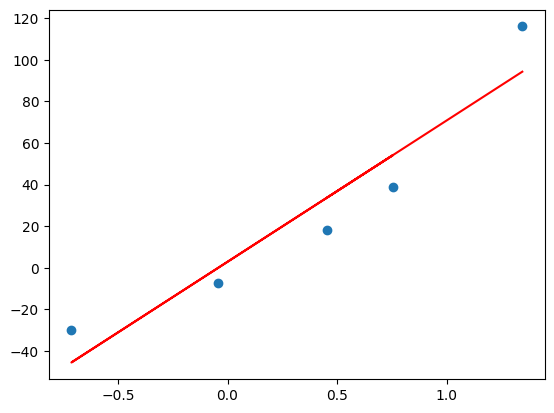

In [18]:
plt.scatter(X,y)
plt.plot(X,regressor.predict(X),color='red')

In [19]:

class GDR:

  def __init__(self,lr,epochs):
    self.m=-100
    self.c=150
    self.lr = lr
    self.epochs = epochs

  def updateparameters(self,X,y):
    for i in range(self.epochs):
      slope_c = -2 * np.sum(y - self.m*X.ravel() - self.c)
      slope_m = -2 * np.sum((y - self.m*X.ravel() - self.c)*X.ravel())

      stepsize_m = self.lr*slope_m
      stepsize_c = self.lr*slope_c
      self.c = self.c - (stepsize_c)
      self.m = self.m - (stepsize_m)

    print(f'm:{self.m}')
    print(f'c:{self.c}')

  def predict(self):
    y_pred = self.m*X+self.c
    return y_pred

gd = GDR(0.01,300)
gd.updateparameters(X,y)
gd.predict()



m:67.94532360051123
c:2.922984749636085


array([[ 94.31635561],
       [-45.48062931],
       [ -0.10079131],
       [ 54.13788527],
       [ 33.62152031]])

In [20]:
def updateparameters(epochs=1):
  m=-130
  c=150
  lr = 0.01
  for i in range(epochs):
    slope_c = -2 * np.sum(y - m*X.ravel() - c)
    slope_m = -2 * np.sum((y - m*X.ravel() - c)*X.ravel())

    stepsize_m = lr*slope_m
    stepsize_c = lr*slope_c
    c = c - (stepsize_c)
    m = m - (stepsize_m)
  y_pred = m*X+c
  print(f'm(slope):{m}')
  print(f'c(intercept):{c}')
  print(f'epochs/iterations: {epochs}')
  print(f'                                equation: y = {round(m)}x + {round(c)}')
  plt.scatter(X,y)
  plt.plot(X,y_pred,color='red')
  plt.ylim(-50,250)
  plt.xlim(-1,1.5)
  plt.xlabel('input or independent variable (x)')
  plt.ylabel('output or target varaible (y)')
  plt.show()

widgets.interact(updateparameters, epochs=(1,130,1))

interactive(children=(IntSlider(value=1, description='epochs', max=130, min=1), Output()), _dom_classes=('widg…

<function __main__.updateparameters(epochs=1)>

### **Demonstrate the fitting of model with the dataset**

In [21]:
def updateparameters1(epochs=1):
  m=-130
  c=150
  lr = 0.01
  for i in range(epochs):
    slope_c = -2 * np.sum(y - m*X.ravel() - c)
    slope_m = -2 * np.sum((y - m*X.ravel() - c)*X.ravel())

    stepsize_m = lr*slope_m
    stepsize_c = lr*slope_c
    c = c - (stepsize_c)
    m = m - (stepsize_m)
  y_pred = m*X+c
  print(f'm(slope):{m}')
  print(f'c(intercept):{c}')
  print(f'epochs/iterations: {epochs}')
  print(f'                                equation: y = {round(m)}x + {round(c)}')
  plt.scatter(X,y)
  plt.plot(X,y_pred,color='red')
  plt.xlabel('input or independent variable (x)')
  plt.ylabel('output or target varaible (y)')
  plt.ylim(-50,250)
  plt.xlim(-1,1.5)
  plt.show()

display(HTML('''<link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"> '''))
widgets.interact(updateparameters1, epochs=widgets.Play(min=1,max=130,interval=200));

interactive(children=(Play(value=1, description='epochs', interval=200, max=130, min=1), Output()), _dom_class…

### **Demonstrate the graph of Loss Function with m(slope of line)**

In [22]:
def cost_plot():
  slope=np.arange(-1000,1500,1)
  inc = 2.922984749636085
  loss=[]
  for i in slope:
    loss.append(np.sum((y- i*X.ravel() - inc)**2))
  plt.plot(slope,loss)
  plt.ylim(0,100000)
  plt.xlim(-150,250)
  return (slope,loss)
  #plt.show()

def updateparameters2(epochs=1):
  m=-300
  c=150
  lr = 0.01
  cost = []
  m_i = []
  slope=np.arange(-1000,1500,1)
  inc = 2.922984749636085
  loss=[]
  for i in slope:
    loss.append(np.sum((y- i*X.ravel() - inc)**2))
  plt.plot(slope,loss)

  for i in range(epochs):
    #slope_c = -2 * np.sum(y - m*X.ravel() - c)
    slope_m = -2 * np.sum((y - m*X.ravel() - inc)*X.ravel())

    stepsize_m = lr*slope_m
    #stepsize_c = lr*slope_c
    #c = c - (stepsize_c)
    m = m - (stepsize_m)
    m_i.append(m)
    cost.append(np.sum((y- m*X.ravel() - inc)**2))
  y_pred = m*X+inc
  loss = np.sum((y- m*X.ravel() - inc)**2)
  print(f'm:{m}')
  print(f'Loss(m): {loss}')
  print(f'epochs/iterations: {epochs}')
  #print(f'c:{c}')
  #print(f'cost:{cost}')
  plt.scatter(m_i,cost,color='red')
  plt.ylim(0,100000)
  plt.xlim(-150,250)
  plt.ylabel('Loss Function L(m)')
  plt.xlabel('m(slope of line)')
  plt.show()


#widgets.interact(updateparameters2, epochs=(1,300,1))
display(HTML('''<link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"> '''))
widgets.interact(updateparameters2, epochs=widgets.Play(min=1,max=120,interval=500));

interactive(children=(Play(value=1, description='epochs', interval=500, max=120, min=1), Output()), _dom_class…

### **Demostrate effect of Learning Rate**

In [23]:


def cost_plot():
  slope=np.arange(-1000,1500,1)
  inc = 2.922984749636085
  loss=[]
  for i in slope:
    loss.append(np.sum((y- i*X.ravel() - inc)**2))
  plt.plot(slope,loss)
  plt.ylim(0,180000)
  plt.xlim(-300,350)
  return (slope,loss)
  #plt.show()

def updateparameters2(epochs=1):
  m=-300
  c=150
  lr = 0.001
  cost = []
  m_i = []
  slope=np.arange(-1000,1500,1)
  inc = 2.922984749636085
  loss=[]
  for i in slope:
    loss.append(np.sum((y- i*X.ravel() - inc)**2))
  plt.plot(slope,loss)

  for i in range(epochs):
    #slope_c = -2 * np.sum(y - m*X.ravel() - c)
    slope_m = -2 * np.sum((y - m*X.ravel() - inc)*X.ravel())

    stepsize_m = lr*slope_m
    #stepsize_c = lr*slope_c
    #c = c - (stepsize_c)
    m = m - (stepsize_m)
    m_i.append(m)
    cost.append(np.sum((y- m*X.ravel() - inc)**2))
  y_pred = m*X+inc
  loss = np.sum((y- m*X.ravel() - inc)**2)
  print(f'm:{m}')
  print(f'Loss(m): {loss}')
  print(f'epochs/iterations: {epochs}')
  print(f'                                   Learning Rate: {lr}')
  #print(f'c:{c}')
  #print(f'cost:{cost}')
  plt.plot(m_i,cost,color='red',linewidth=3)
  plt.ylabel('Loss Function L(m)')
  plt.xlabel('m(slope of line)')
  plt.ylim(0,180000)
  plt.xlim(-300,350)
  plt.show()


#widgets.interact(updateparameters2, epochs=(1,300,1))
display(HTML('''<link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"> '''))

#widgets.interact(updateparameters2, epochs=widgets.Play(min=1,max=120,  interval=800));     # big lr
#widgets.interact(updateparameters2, epochs=widgets.Play(min=1,max=120,   interval=500));    # normal lr
widgets.interact(updateparameters2, epochs=widgets.Play(min=1,max=1000));                    # small lr

interactive(children=(Play(value=1, description='epochs', max=1000, min=1), Output()), _dom_classes=('widget-i…

m:67.94532360051123
c:2.922984749636085
cost:[98114.0111191276, 89368.86016738991, 81564.82894941182, 74570.34923846382, 68277.31773563311, 62596.25740549535, 57452.54263805624, 52783.44857243043, 48535.83938374904, 44664.35238504988, 41129.967263635386, 37898.87484303521, 34941.579124641685, 32232.1813194877, 29747.806135483504, 27468.139514322447, 25375.05391380401, 23452.302567505103, 21685.26828114279, 20060.755518845504, 18566.817005337438, 17192.607985738603, 15928.262769896366, 14764.789340637206, 13693.97870052932, 12708.326327956422, 11800.963655528136, 10965.597906858902, 10196.458958393605, 9488.252151999122, 8836.116187518961, 8235.58538480661, 7682.555731506381, 7173.254233461888, 6704.211164850241, 6272.234879416797, 5874.388895973863, 5507.971013305184, 5170.494243867661, 4859.669383820674, 4573.389060201761, 4309.7131154887165, 4066.855206110717, 3843.1705052971247, 3637.14441245494, 3447.382181417188, 3272.5993886994443, 3111.6131705738967, 2963.3341645065366, 2826.759

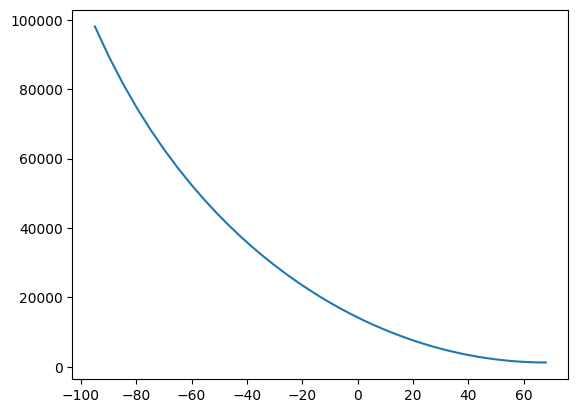

In [24]:
def updateparameters1(epochs=1):
  m=-100
  c=150
  lr = 0.01
  cost = []
  m_i = []
  for i in range(epochs):
    slope_c = -2 * np.sum(y - m*X.ravel() - c)
    slope_m = -2 * np.sum((y - m*X.ravel() - c)*X.ravel())

    stepsize_m = lr*slope_m
    stepsize_c = lr*slope_c
    c = c - (stepsize_c)
    m = m - (stepsize_m)
    m_i.append(m)
    cost.append(np.sum((y- m*X.ravel() - c)**2))
  y_pred = m*X+c
  print(f'm:{m}')
  print(f'c:{c}')
  print(f'cost:{cost}')
  #plt.scatter(X,y)
  plt.plot(m_i,cost)
  #plt.ylim(-50,250)
  #plt.xlim(-1,1.5)
  plt.show()
updateparameters1(epochs=300)
#display(HTML('''<link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"> '''))
#widgets.interact(updateparameters1, epochs=widgets.Play(min=1,max=300));